In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading libraries

In [2]:
import sys
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks/Data Mining")

In [24]:
# Importing Important Libraries
import io
import json
import matplotlib.pyplot as plt
from nltk import word_tokenize
import numpy as np
import os
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 25})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Read in data

In [4]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/amazon_alexa.tsv', sep='\t')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### Clean & Explore data

In [6]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [8]:
df.shape

(3150, 5)

### Drop duplicate rows

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(2435, 5)

### Drop any columns with NaNs in either verified_reviews or rating

In [11]:
#df.dropna(subset=['verified_reviews', 'rating'], inplace=True)
df.dropna(how='any', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df.shape

(2435, 5)

### Display distribution of rating scores

Text(0.5, 0, 'Rating Score')

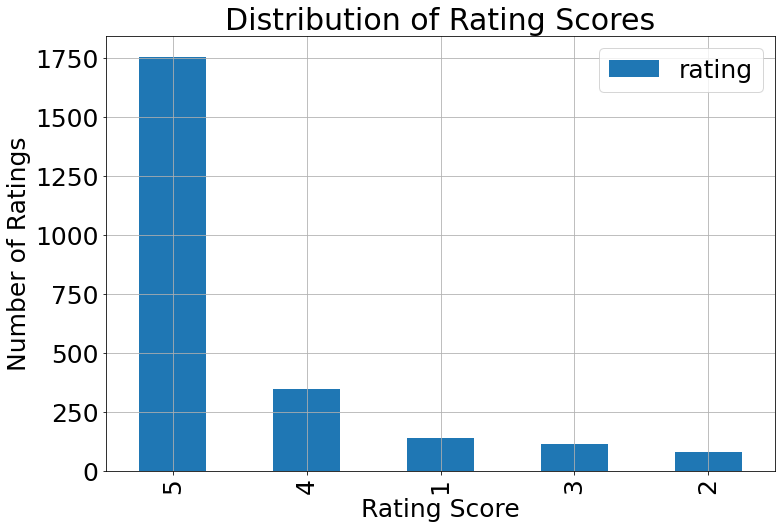

In [13]:
df.rating.value_counts().to_frame().plot(kind='bar', grid=True)
plt.title('Distribution of Rating Scores')
plt.ylabel('Number of Ratings')
plt.xlabel('Rating Score')

### Explore review text

In [14]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
2796    I do love these things, i have them running my...
2797    Only complaint I have is that the sound qualit...
2798                                                 Good
2799                          Nice little unit  no issues
2800    The echo dot was easy to set up and use. It he...
Name: verified_reviews, Length: 2435, dtype: object

In [15]:
num_words = [len(x.split()) for x in df['verified_reviews']]
print('Longest sentence: {} words'.format(max(num_words)))
print('Shortest sentence: {} words'.format(min(num_words)))

Longest sentence: 526 words
Shortest sentence: 0 words


### Drop any rows where there's no text in review_text

In [16]:
df['num_words'] = num_words

In [17]:
df = df[df['num_words'] != 0]

In [18]:
df.shape

(2385, 6)

Text(0, 0.5, 'Review Count')

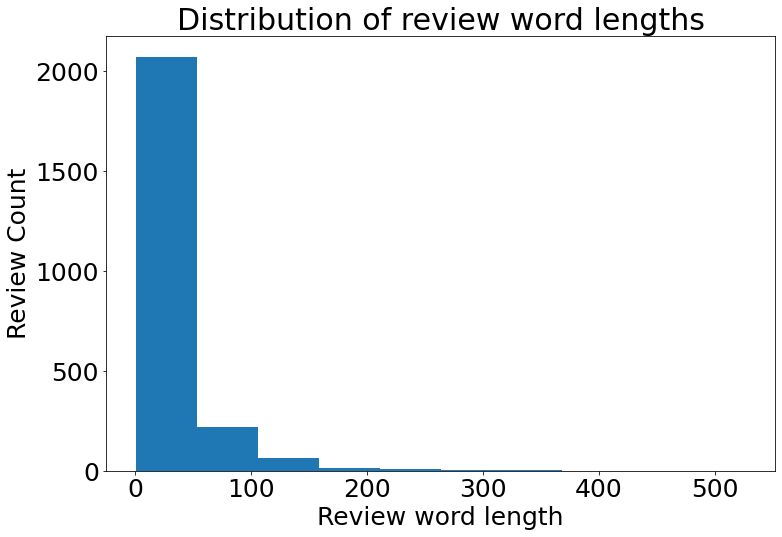

In [19]:
plt.hist(df['num_words'])
plt.title('Distribution of review word lengths')
plt.xlabel('Review word length')
plt.ylabel('Review Count')

In [20]:
#!pip install nltk

In [23]:
text = ' '.join([x for x in df['verified_reviews']]).split()
text_less_sw = [word for word in text if not word in stopwords.words()]
text_less_sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Love',
 'Echo!',
 'Loved',
 'it!',
 'Sometimes',
 'playing',
 'game,',
 'answer',
 'question',
 'correctly',
 'Alexa',
 'says',
 'got',
 'wrong',
 'answers',
 'you.',
 'I',
 'like',
 'able',
 'turn',
 'lights',
 'away',
 'home.',
 'I',
 'lot',
 'fun',
 'thing.',
 'My',
 '4',
 'yr',
 'old',
 'learns',
 'dinosaurs,',
 'control',
 'lights',
 'play',
 'games',
 'like',
 'categories.',
 'Has',
 'nice',
 'sound',
 'playing',
 'music',
 'well.',
 'Music',
 'I',
 'received',
 'echo',
 'gift.',
 'I',
 'needed',
 'another',
 'Bluetooth',
 'something',
 'play',
 'music',
 'easily',
 'accessible,',
 'found',
 'smart',
 'speaker.',
 'Can’t',
 'wait',
 'see',
 'else',
 'do.',
 'Without',
 'cellphone,',
 'I',
 'cannot',
 'use',
 'many',
 'features.',
 'I',
 'iPad',
 'see',
 'use.',
 'It',
 'IS',
 'great',
 'alarm.',
 'If',
 'r',
 'almost',
 'deaf,',
 'hear',
 'alarm',
 'bedroom',
 'living',
 'room,',
 'reason',
 'enough',
 'keep',
 'her.It',
 'fun',
 'ask',
 'random',
 'questions',
 'hear',
 'respo

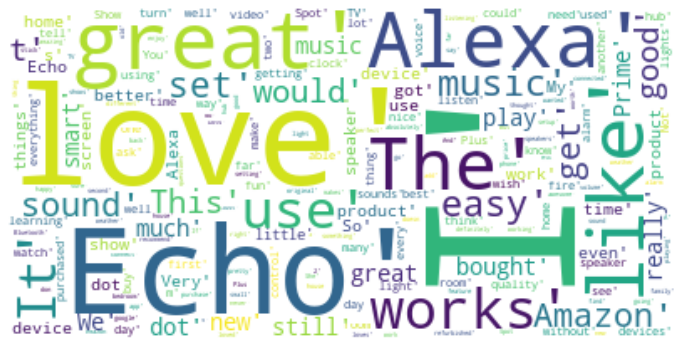

In [25]:
from wordcloud import WordCloud
# text = [re.sub(r'[^a-zA-Z ]', '', word) for word in text]
#text = ' '.join([x for x in df['verified_reviews']]).split()
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color='white').generate(str(text_less_sw))
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##

In [20]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
2796    I do love these things, i have them running my...
2797    Only complaint I have is that the sound qualit...
2798                                                 Good
2799                          Nice little unit  no issues
2800    The echo dot was easy to set up and use. It he...
Name: verified_reviews, Length: 2385, dtype: object

In [25]:
stop = stopwords.words('english')

In [26]:
df['verified_reviews_less_sw'] = df['verified_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [27]:
df

,rating,date,variation,verified_reviews,feedback,num_words,verified_reviews_less_sw
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,3,Love Echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,2,Loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38,"Sometimes playing game, answer question correc..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34,"I lot fun thing. My 4 yr old learns dinosaurs,..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,1,Music
...,...,...,...,...,...,...,...
2796,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,83,"I love things, running entire home, TV, lights..."
2797,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,76,Only complaint I sound quality great. I mostly...
2798,4,29-Jul-18,Black Dot,Good,1,1,Good
2799,5,29-Jul-18,Black Dot,Nice little unit no issues,1,5,Nice little unit issues


In [32]:
reviews_list = [x for x in df['verified_reviews_less_sw']]

In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [41]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(reviews_list)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(reviews_list)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 100
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/My Drive/Colab Notebooks/Data Mining/glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

[[10, 7, 12], [251, 4], [288, 179, 201, 6, 1643, 24, 29, 325, 6, 590, 723, 19, 21, 400, 24, 105, 4, 591, 5, 521, 1, 199, 25, 24, 2, 26, 168, 130, 3, 135, 141, 20, 5, 90, 179, 334, 61, 62], [2, 15, 59, 6, 176, 14, 104, 13, 11, 106, 7, 316, 1644, 229, 922, 99, 2234, 2, 177, 1, 141, 5, 84, 401, 26, 2235, 53, 138, 41, 42, 201, 30, 25, 88], [30], [2, 490, 1, 12, 25, 6, 244, 2, 386, 157, 230, 51, 222, 3, 84, 30, 339, 2236, 5, 387, 11, 80, 71, 439, 561, 3, 137, 60, 350, 4, 29, 45], [169, 109, 6, 2237, 2, 440, 27, 149, 14, 108, 196, 2, 15, 49, 1339, 19, 45, 23, 137, 18, 14, 127, 27, 4, 8, 6, 16, 113, 55, 676, 2238, 421, 1645, 24, 29, 234, 108, 113, 17, 1, 161, 61, 79, 17, 1, 326, 110, 22, 18, 8, 340, 252, 3, 351, 108, 4, 8, 104, 3, 143, 923, 194, 3, 234, 108, 543, 66, 92, 23, 592, 3, 38, 36, 2239, 1646, 253], [2, 166, 11, 8, 1, 1647, 34, 297, 162, 95, 180, 20, 163, 34, 17, 191, 110, 14, 7, 120, 2, 78, 26, 60, 196, 107, 924, 2240, 201, 30, 20, 35, 441, 5, 1028, 1, 141, 491, 7, 120], [298, 16], 

In [51]:
len(t.word_index)

4254

In [50]:
len(i)

TypeError: ignored

In [52]:
#!pip install sentence-transformers

     |████████████████████████████████| 78 kB 2.8 MB/s 
     |████████████████████████████████| 3.4 MB 28.9 MB/s 
     |████████████████████████████████| 6.8 MB 41.2 MB/s 
     |████████████████████████████████| 1.2 MB 56.7 MB/s 
     |████████████████████████████████| 61 kB 415 kB/s 
     |████████████████████████████████| 596 kB 39.6 MB/s 
     |████████████████████████████████| 895 kB 59.1 MB/s 
     |████████████████████████████████| 3.3 MB 44.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=ea9de991c01f641d6b2522d9294074e074f9003df92a94c84d9e26c7d927090d
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [31]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [34]:
reviews_list

['Love Echo!',
 'Loved it!',
 'Sometimes playing game, answer question correctly Alexa says got wrong answers you. I like able turn lights away home.',
 'I lot fun thing. My 4 yr old learns dinosaurs, control lights play games like categories. Has nice sound playing music well.',
 'Music',
 'I received echo gift. I needed another Bluetooth something play music easily accessible, found smart speaker. Can’t wait see else do.',
 'Without cellphone, I cannot use many features. I iPad see use. It IS great alarm. If u r almost deaf, hear alarm bedroom living room, reason enough keep her.It fun ask random questions hear response. She seem smartbon politics yet.',
 "I think 5th one I've purchased. I'm working getting one every room house. I really like features offer specifily playing music Echos controlling lights throughout house.",
 'looks great',
 'Love it! I’ve listened songs I haven’t heard since childhood! I get news, weather, information! It’s great!',
 'I sent 85 year old Dad, talks c

In [36]:
sentence_embeddings = sbert_model.encode(reviews_list)

In [38]:
sentence_embeddings.shape

(2385, 768)

In [41]:
pd.DataFrame(sentence_embeddings).to_csv('/content/drive/My Drive/Colab Notebooks/Data Mining/review_sentence_vectors.csv')

In [43]:
df['rating'].to_csv('/content/drive/My Drive/Colab Notebooks/Data Mining/reviews_rating.csv')